In [1]:
from pypfopt import risk_models
from pypfopt import plotting
from pypfopt import expected_returns
from pypfopt import EfficientFrontier
from pypfopt import CLA, plotting
from pypfopt.black_litterman import BlackLittermanModel

import pypfopt

import yfinance as yf

from datetime import datetime
import matplotlib.pylab as plt
import pandas as pd

In [3]:
start_date = "2020-1-30"
tickers = ["PBW","DDOG","TWLO","FSLY","PTON","FIVN","CRWD","U","NVDA","ZM",
           "SE","TTD","ROKU","NET","ZS","OKTA","DOCU","SQ","NIO","FRPT","TRUP","CHWY"]
ohlc = yf.download(tickers, period="max")
prices = ohlc["Adj Close"]
prices.tail()
prices = prices[start_date:]


[*********************100%***********************]  22 of 22 completed


In [460]:
market_prices = yf.download("SPY", period="max")["Adj Close"]
market_prices = prices[start_date:]

[*********************100%***********************]  1 of 1 completed


In [461]:
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting


In [462]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

AAPL    2.353811
AMZN    4.867068
DDOG    2.518841
JKS     1.587624
MSFT    1.575167
NIO     2.620863
PTON    3.136417
REGI    1.328359
RUN     2.810938
SE      4.740055
SPWR    1.474782
SQ      2.188254
TSLA    2.221632
TWLO    2.154518
VSLR    2.295776
ZM      3.718491
dtype: float64

In [463]:
mcaps = {}
for t in tickers:
    print("processing %s", t)
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]
mcaps

processing %s SQ
processing %s DDOG
processing %s TWLO
processing %s SE
processing %s ZM
processing %s PTON
processing %s AMZN
processing %s MSFT
processing %s AAPL
processing %s VSLR
processing %s TSLA
processing %s REGI
processing %s RUN
processing %s SPWR
processing %s NIO
processing %s JKS


{'SQ': 71377600512,
 'DDOG': 28155555840,
 'TWLO': 35179474944,
 'SE': 78047838208,
 'ZM': 138840113152,
 'PTON': 27916224512,
 'AMZN': 1589717106688,
 'MSFT': 1583909175296,
 'AAPL': 1962342481920,
 'VSLR': 4936896512,
 'TSLA': 393931587584,
 'REGI': 1879315840,
 'RUN': 9113527296,
 'SPWR': 1974698368,
 'NIO': 23101595648,
 'JKS': 1671339904}

In [464]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

AAPL    0.547308
AMZN    0.825491
DDOG    0.390485
JKS     0.339712
MSFT    0.357366
NIO     0.456890
PTON    0.330634
REGI    0.311247
RUN     0.595213
SE      0.924591
SPWR    0.338504
SQ      0.545818
TSLA    0.651759
TWLO    0.374830
VSLR    0.373245
ZM      0.272773
dtype: float64

<ipython-input-466-eea445e07c2e>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],


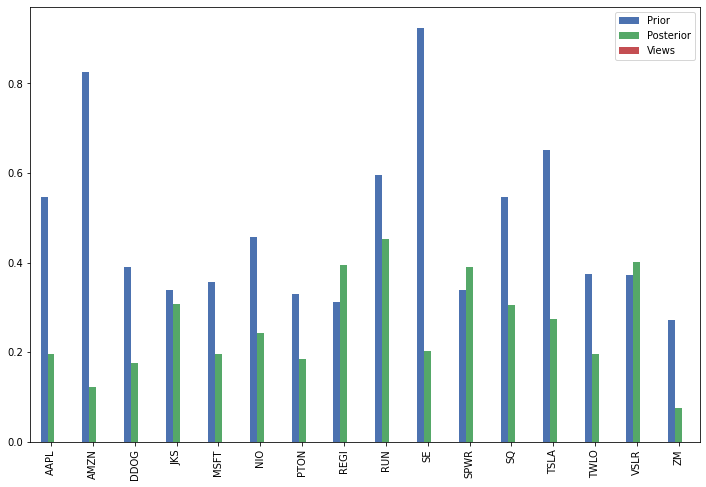

In [466]:
import numpy as np

viewdict = {}

omega = np.diag(variances)
confidences = [
]
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_averison="delta",
                        absolute_views=viewdict, omega="idzorek",view_confidences=confidences)#

ret_bl = bl.bl_returns()
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)], 
             index=["Prior", "Posterior", "Views"]).T
rets_df.plot.bar(figsize=(12,8));
S_bl = bl.bl_cov()

In [467]:
from pypfopt import EfficientFrontier, objective_functions

ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.min_volatility()
weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)
weights

Expected annual return: 20.8%
Annual volatility: 43.7%
Sharpe Ratio: 0.43


OrderedDict([('AAPL', 0.09842),
             ('AMZN', 0.13477),
             ('DDOG', 0.08178),
             ('JKS', 0.03812),
             ('MSFT', 0.09796),
             ('NIO', 0.04679),
             ('PTON', 0.10475),
             ('REGI', 0.0548),
             ('RUN', 0.02374),
             ('SE', 0.07338),
             ('SPWR', 0.0136),
             ('SQ', 0.01372),
             ('TSLA', 0.01004),
             ('TWLO', 0.0622),
             ('VSLR', 0.0426),
             ('ZM', 0.10331)])

In [468]:

ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)
weights

Expected annual return: 32.2%
Annual volatility: 58.4%
Sharpe Ratio: 0.52


/Users/jameszhao/.local/share/virtualenvs/trading_tools-DCkkE-wc/lib/python3.8/site-packages/pypfopt/efficient_frontier.py:195: UserWarning: max_sharpe transforms the optimisation problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('AAPL', 0.0435),
             ('AMZN', 0.01344),
             ('DDOG', 0.0276),
             ('JKS', 0.05057),
             ('MSFT', 0.04293),
             ('NIO', 0.02917),
             ('PTON', 0.11454),
             ('REGI', 0.16558),
             ('RUN', 0.16557),
             ('SE', 0.0342),
             ('SPWR', 0.09681),
             ('SQ', 0.06138),
             ('TSLA', 0.02836),
             ('TWLO', 0.03385),
             ('VSLR', 0.0906),
             ('ZM', 0.00191)])

In [ ]:

ef = EfficientFrontier(ret_bl, S_bl, weight_bounds=(-1,1))
# ef.add_objective(objective_functions.L2_reg)
ef.min_volatility()
weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)
weights

In [469]:

ef = EfficientFrontier(ret_bl, S_bl, weight_bounds=(-1,1))
# ef.add_objective(objective_functions.L2_reg)
ef.min_volatility()
weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)
weights

Expected annual return: 14.6%
Annual volatility: 39.1%
Sharpe Ratio: 0.32


OrderedDict([('AAPL', 0.14539),
             ('AMZN', 0.38598),
             ('DDOG', 0.09566),
             ('JKS', 0.03156),
             ('MSFT', 0.19057),
             ('NIO', 0.0266),
             ('PTON', 0.07678),
             ('REGI', 0.02053),
             ('RUN', -0.01606),
             ('SE', 0.04126),
             ('SPWR', -0.05528),
             ('SQ', -0.12903),
             ('TSLA', -0.06942),
             ('TWLO', 0.03648),
             ('VSLR', 0.10058),
             ('ZM', 0.11841)])

In [470]:

ef = EfficientFrontier(ret_bl, S_bl, weight_bounds=(-1,1))
# ef.add_objective(objective_functions.L2_reg)
ef.min_volatility()
weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)
weights

Expected annual return: 14.6%
Annual volatility: 39.1%
Sharpe Ratio: 0.32


OrderedDict([('AAPL', 0.14539),
             ('AMZN', 0.38598),
             ('DDOG', 0.09566),
             ('JKS', 0.03156),
             ('MSFT', 0.19057),
             ('NIO', 0.0266),
             ('PTON', 0.07678),
             ('REGI', 0.02053),
             ('RUN', -0.01606),
             ('SE', 0.04126),
             ('SPWR', -0.05528),
             ('SQ', -0.12903),
             ('TSLA', -0.06942),
             ('TWLO', 0.03648),
             ('VSLR', 0.10058),
             ('ZM', 0.11841)])